<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/%EC%B5%9C%EA%B7%9C%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 따릉이 데이터를 활용한 데이터 분석

- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

---
## 1. 라이브러리 및 데이터
## Library & Data

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [5]:
# 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/smarcle kaggle study db/따릉이/train.csv")
test = pd.read_csv("/content/drive/MyDrive/smarcle kaggle study db/따릉이/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/smarcle kaggle study db/따릉이/submission.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [10]:
#.head() : 맨 위 다섯개 행 확인
#.tail() : 맨 아래 다섯개 행 확인
#.shape() : 행/열의 개수 순써상으로 반환
#.info() : column(열)별 정보를 알려줌
#.describe() : 여러가지 통계값 표시

__.info() 함수를 통해 결측치를 확인한다.__

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


<Axes: xlabel='hour'>

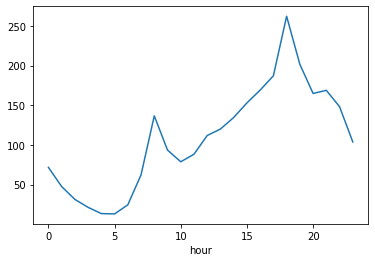

In [17]:
#groupby 함수에서 hour 기준을 sort 후 column(열) 별 평균(mean) 산출 후 count 값 표시 / plot함수로 시각화
train.groupby('hour').mean()['count'].plot()

## matplotlib 라이브러리 임포트

In [18]:
import matplotlib.pyplot as plt

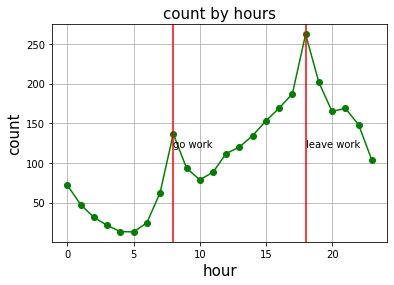

In [75]:
#.plot() 함수의 인자
plt.plot(train.groupby('hour').mean()['count'], 'go-') #데이터 점으로 표시, -선으로 잇기
plt.grid() #그리드 표시

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.axvline(8, color = 'r') #x좌표 8에 대해 보조선
plt.axvline(18, color = 'r')

plt.text(8, 120, 'go work', fontsize = 10) #데이터 좌표값 근처에 정보 등록해줌
plt.text(18, 120, 'leave work', fontsize = 10)

plt.savefig('picture.png')    #그래프 사진 저장

### 상관계수

In [74]:
#데이터셋의 상관관계 확인인
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,0.000236,-0.056267,-0.002910,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407626,0.021646,0.463820,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,0.000236,0.407626,1.000000,-0.097056,0.376661,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.618222
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022817,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.002910,0.463820,0.376661,0.022817,1.000000,-0.433144,0.250098,0.520095,0.010811,-0.198042,0.459692
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433144,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.250098,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520095,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010811,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.198042,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<Axes: >

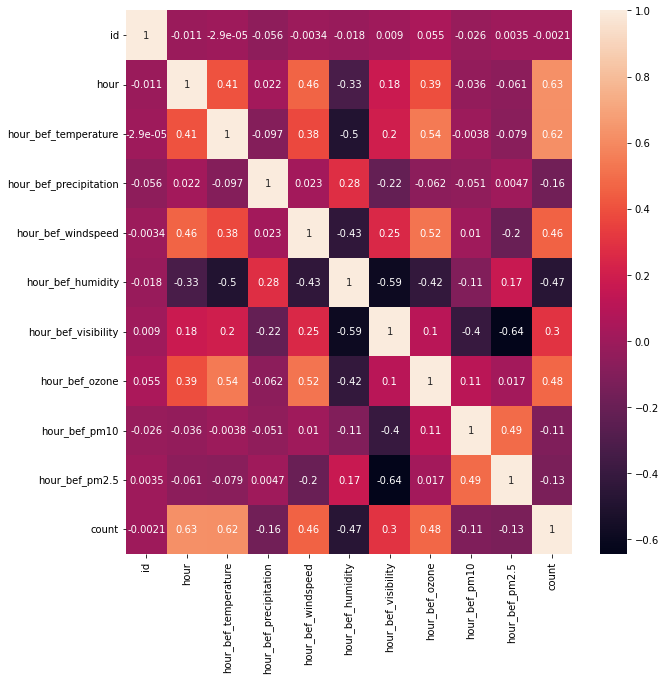

In [36]:
import seaborn as sns

plt.figure(figsize=(10,10)) #히트맵 크기 재설정(plt 라이브러리)
sns.heatmap(train.corr(), annot=True) #seaborn 히트맵으로 가시화

submission에 제출해야 하는 count 항목에 대하여,\
hour, hour_bef_temperature, hour_bef_windspeed 세 개의 항목이 상관도가 높음을 알 수 있다.

---
## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [38]:
train.isna().sum()  #T/F이므로 sum을 구해 결측치를 살핀다.

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [39]:
train[train['hour_bef_temperature'].isna()] #주요 상관계수의 결측치를 살핀다.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


결측치를 해결하는 데에는 여러가지 값이 있으나, 이번에는 중간값으로 메꾸지 않는다.\
현재 중요 상관계수인 hour_bef_temperature의 경우, 기온은 일중 시간에 따라 고저를 반복하는 __경향성__이 있어 중간값으로 메꿀 경우 오차가 발생하게 된다.\
따라서 보다 세밀한 전처리가 필요하다.

In [40]:
#hour별로 sort해서 메꿀 값의 평균 살펴보기
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

hour별로 sort해본다

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [41]:
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace=True)   #결측값이 존재하는 934행에 hour별로 sort하여 평균낸 값 중 0시에 해당하는 값 삽입
#저장을 위해 inplace인자 True로 조정

In [46]:
train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [47]:
#같은 방식으로 다른 결측치도 메꾼다
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [50]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [49]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace=True)

In [51]:
#testset도 살피자
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [52]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
test['hour_bef_temperature'].fillna(19.704918, inplace=True)

In [54]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
test['hour_bef_windspeed'].fillna(3.595082, inplace=True)

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

### sklearn.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

In [61]:
#정의역 설정
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed']

#모델 대입값 한정
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [66]:
#여러 모델을 돌려보며 튜닝
model100 = RandomForestRegressor(n_estimators=100, random_state=0)   #많은 decisionTree를 이용하는 모델
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

def __init__(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

---
def __init__(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

아래가 랜덤포레스트 리그레서의 인자\
n_estimators가 디시젼트리 리그레서의 수이다.\
n_jobs는 cpu의 개수를 의미한다. 모든 cpu를 활용하려면 -1을 대입하면 된다.\
max_depth는 모델의 오버피팅을 방지하는 인자이다.


In [67]:
#모델 학습
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [68]:
#예측
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

In [76]:
submission['count'] = ypred1
submission.to_csv('model100.csv', index=False)

In [77]:
submission['count'] = ypred2
submission.to_csv('model100_5.csv', index=False)

In [78]:
submission['count'] = ypred3
submission.to_csv('model200.csv', index=False)

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

### model.predict()
- 모델 예측

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

## 6. 결과 및 결언
## Conclusion & Discussion